In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import math

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
print(os.listdir('/content/drive/MyDrive/Datasets/chest_xray'))

['train', 'chest_xray', 'test', '__MACOSX', 'val', 'Pneumonia_cnn_model.h5', 'my_model.keras']


In [4]:
# Importing datas
train_dir = "/content/drive/MyDrive/Datasets/chest_xray/train"
train_normal = len(os.listdir(os.path.join(train_dir, "NORMAL")))
train_pneumonia = len(os.listdir(os.path.join(train_dir, "PNEUMONIA")))

test_dir = "/content/drive/MyDrive/Datasets/chest_xray/test/"
test_normal = len(os.listdir(os.path.join(test_dir, "NORMAL")))
test_pneumonia = len(os.listdir(os.path.join(test_dir, "PNEUMONIA")))

val_dir = "/content/drive/MyDrive/Datasets/chest_xray/val"
val_normal = len(os.listdir(os.path.join(val_dir, "NORMAL")))
val_pneumonia = len(os.listdir(os.path.join(val_dir, "PNEUMONIA")))

In [5]:
print("Train Data:")
print("The number of normal images are:",train_normal)
print("The number of pneumonia images are:",train_pneumonia)

print("Test Data:")
print("The number of normal images are:",test_normal)
print("The number of pneumonia images are:",test_pneumonia)

Train Data:
The number of normal images are: 1341
The number of pneumonia images are: 3875
Test Data:
The number of normal images are: 234
The number of pneumonia images are: 390


In [6]:
# # Load one image from each category
# train_normal_image = Image.open(os.path.join(train_normal, os.listdir(train_normal_dir)[0]))
# train_pneumonia_image = Image.open(os.path.join(train_pneumonia, os.listdir(train_pneumonia_dir)[0]))

# # Plotting the normal image
# plt.figure(figsize=(5,5))
# plt.imshow(train_normal_image, cmap='gray')
# plt.title('Normal')

# # Plotting the pneumonia image
# plt.figure(figsize=(5,5))
# plt.imshow(train_pneumonia_image, cmap='gray')
# plt.title('Pneumonia')

# plt.show()


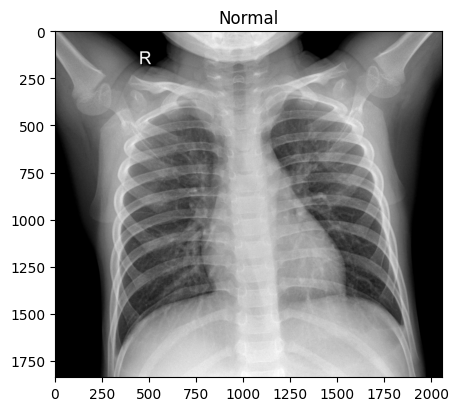

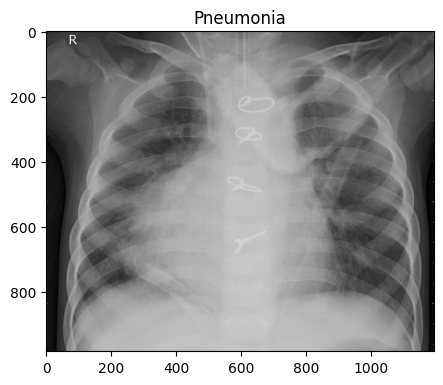

In [7]:
# Define the directories
# train_dir = "/content/drive/MyDrive/Datasets/chest_xray/train"
train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

# Load one image from each category
train_normal_image = Image.open(os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0]))
train_pneumonia_image = Image.open(os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[3]))

# Plotting the normal image
plt.figure(figsize=(5,5))
plt.imshow(train_normal_image, cmap='gray')
plt.title('Normal')

# Plotting the pneumonia image
plt.figure(figsize=(5,5))
plt.imshow(train_pneumonia_image, cmap='gray')
plt.title('Pneumonia')

plt.show()


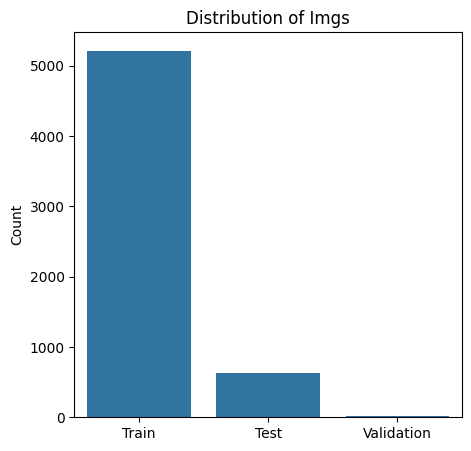

In [8]:
# Simple EDA
plt.figure(figsize=(5, 5))
sns.barplot(x=["Train", "Test", "Validation"], y=[train_normal + train_pneumonia, test_normal + test_pneumonia, val_normal + val_pneumonia])
plt.title("Distribution of Imgs")
plt.ylabel("Count")
plt.show()

In [9]:
# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [10]:
#CONSTs
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32

In [11]:
# these generators are essential for efficiently feeding batches of preprocessed images into a machine learning model during the training, validation,
# and testing phases. They handle tasks such as resizing, rescaling, and batching, making it easier to work with large datasets without loading all the
# images into memory at once.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
# Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])



In [13]:
# Correctly calculate steps_per_epoch and validation_steps
steps_per_epoch = math.ceil(train_generator.samples / BATCH_SIZE)
validation_steps = math.ceil(validation_generator.samples / BATCH_SIZE)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/15
163/163 [==============================] - 756s 4s/step - loss: 0.5379 - accuracy: 0.7479 - val_loss: 0.7724 - val_accuracy: 0.6875
Epoch 2/15
163/163 [==============================] - 100s 610ms/step - loss: 0.3856 - accuracy: 0.8087 - val_loss: 0.6041 - val_accuracy: 0.6250
Epoch 3/15
163/163 [==============================] - 90s 554ms/step - loss: 0.3232 - accuracy: 0.8474 - val_loss: 0.6873 - val_accuracy: 0.6250
Epoch 4/15
163/163 [==============================] - 88s 540ms/step - loss: 0.3010 - accuracy: 0.8593 - val_loss: 0.5926 - val_accuracy: 0.7500
Epoch 5/15
163/163 [==============================] - 90s 549ms/step - loss: 0.2930 - accuracy: 0.8691 - val_loss: 0.5526 - val_accuracy: 0.6875
Epoch 6/15
163/163 [==============================] - 89s 546ms/step - loss: 0.2728 - accuracy: 0.8783 - val_loss: 0.7953 - val_accuracy: 0.6250
Epoch 7/15
163/163 [==============================] - 90s 550ms/step - loss: 0.2676 - accuracy: 0.8744 - val_loss: 0.5644 - val_acc

In [14]:


# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // BATCH_SIZE,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // BATCH_SIZE
# )

In [15]:
# Results
test_results = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

19/19 [==============================] - 268s 15s/step - loss: 0.3652 - accuracy: 0.8569
Test Loss: 0.3652490973472595
Test Accuracy: 0.8569079041481018


In [16]:
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)

20/20 [==============================] - 7s 352ms/step


In [17]:
print(classification_report(test_generator.classes, y_pred, target_names=["Normal", "Pneumonia"]))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)



              precision    recall  f1-score   support

      Normal       0.37      0.27      0.32       234
   Pneumonia       0.62      0.72      0.67       390

    accuracy                           0.55       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.53      0.55      0.54       624



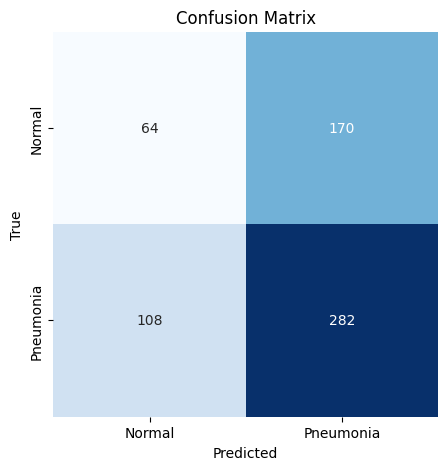

In [20]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from tensorflow.keras.models import load_model, save_model


model.save('/content/drive/MyDrive/Datasets/chest_xray/Pneumonia_cnn_model.h5')
model.save('/content/drive/MyDrive/Datasets/chest_xray/my_model.keras')
print("Model saved successfully.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [19]:
# for images_batch, labels_batch in test_ds.take(1):

#     first_image = images_batch[0].numpy().astype('uint8')
#     first_label = labels_batch[0].numpy()

#     print("first image to predict")
#     plt.imshow(first_image)
#     print("actual label:",class_names[first_label])

#     batch_prediction = model.predict(images_batch)
#     print("predicted label:",class_names[np.argmax(batch_prediction[0])])